In [1]:
import os

import numpy as np
import cv2
import re  # for string splitting
import h5py

from scipy import signal
from droplets import do_cutouts
from droplets import do_metrics
from series import Series

from ipywidgets import interact, interactive, fixed, interact_manual

import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy.random as np_random
import random
import scipy.stats as stats
import matplotlib.cm as cm
import matplotlib.patches as patches

from scipy.interpolate import griddata
from scipy.interpolate import interp2d
from scipy.interpolate import RegularGridInterpolator


import gc
# %matplotlib

In [2]:
def read_hdf5(path, filename):
    f = h5py.File('{0}/{1}'.format(path, filename), 'r')
    return f['data']['time'], f['data']['Tave']


# These are the sizes that are in the folder of hdf5 files. Must have the same timesteps
sizes = [3, 5, 10, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

# sizes is the x
x = sizes

# y is the timesteps, and this is taken from the file t_calib_22.h5
time, _ = read_hdf5(
    '/Users/olofjonsson/Projects/Ice/Analysis/From_Niloo/Temp_sim_Jan2010', 't_calib_22.h5')
y = list(time[:])

# Create an empy matrix with the size of the sizes and times
temperatures = np.zeros([len(x), len(y)])

# Filling the matrix with actual values measured.
for size_index, size_value in enumerate(sizes):
    _, temperatures[size_index] = read_hdf5(
        '/Users/olofjonsson/Projects/Ice/Analysis/From_Niloo/Temp_sim_Jan2010', 't_calib_{0}.h5'.format(size_value))

# This is a function returned by the RegularGridInterpolator
#interpolate_T = interp2d(xx, yy, temperatures, kind='linear',bounds_error=True)
interpolate_T = RegularGridInterpolator((x, y), temperatures)

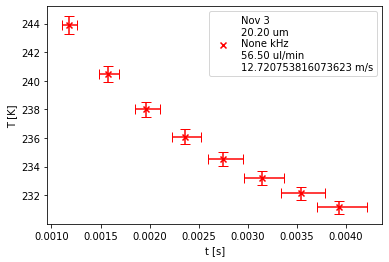

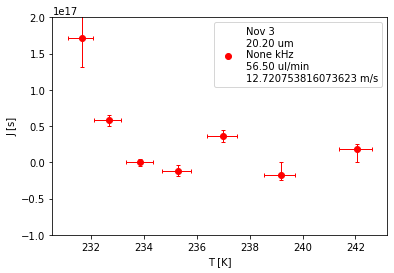

In [3]:
'''class MeasuredPoint(object):
    def __init__(self,distance,count,fraction,parent_series):
        self.distance=distance
        self.count=count
        self.fraction=fraction
        
class Calculated_point(object):
    def __init__(self,distance,time,T,J):
        self.distance=distance
        self.count=count
        self.fraction=fraction
'''





nov_series = Series('Nov 3', interpolate_T)
# CHECK RAW DATA
counts = np.multiply([48, 27, 34, 210, 715, 881, 797, 84], 1)
fractions = [0, 0.03, 0.00, 0.06, 0.04, 0.04,
             0.13, 0.35]  # ice fraction for focused
distances = np.multiply([15, 20, 25, 30, 35, 40, 45, 50], 0.001)  # in m

nov_series.set_observables(d_value=20.2e-6,
                           d_sigma=0.496e-6,
                           s_value=58.3e-6,
                           s_sigma=3.67e-6,
                           q_value=56.5,
                           distances=distances,
                           counts=counts,
                           fractions=fractions)


# print(nov_series.id)
# print(nov_series.descriptor)
# print(nov_series.ideal_t_at_measured)
# print(nov_series.ideal_t_at_calculated)
# print(nov_series.ideal_T_at_calculated)

# print(nov_series.ideal_J)

# print(nov_series.measured_distances)
# print(nov_series.calculated_distances)

nov_series.calculate_errors(percentile=25, do_J=True)

plt.figure()
ax = plt.gca()
# plt.scatter(nov_series.T_MC_matrix.flatten(),nov_series.J_MC_matrix.flatten(),alpha=1,marker='.')

nov_series.generate_plotting_label()
nov_series.plot_measured_T_vs_t(c='red', label=nov_series.plot_label, ax=ax)
ax.set_xlabel('t [s]')
ax.set_ylabel('T [K]')
# print(nov_series.ideal_v)
plt.legend()
# nov_series.plot_calculated_T_vs_t(ax=ax,c='red')


plt.figure('J_plot')
J_ax = plt.gca()
# plt.scatter(nov_series.T_MC_matrix.flatten(),nov_series.J_MC_matrix.flatten(),alpha=1,marker='.')

nov_series.generate_plotting_label()
nov_series.plot_J_vs_T(c='red', label=nov_series.plot_label, ax=J_ax)
J_ax.set_ylabel('J [s]')
J_ax.set_ylim(-1e17, 0.2e18)

J_ax.set_xlabel('T [K]')
# print(nov_series.ideal_v)
plt.legend()

nov_series.save_column_file()

In [5]:
dec7_with_types = Series('Dec 7 with types', interpolate_T)
counts = np.multiply([633, 566, 298, 325], 1)
fractions = [0.0458, 0.362, 0.987, 0.99999]  # ice fraction for focused

distances = np.multiply([40, 45, 47.5, 50], 0.001)  # in m

sideblob_counts = [15, 50, 192, 176]
marbles_counts = [12, 149, 74, 15]
fractured_counts = [2, 6, 28, 134]
water_counts = [604, 361, 4, 0]
water_counts = [604, 361, 4, 2]

type_counts = np.array([sideblob_counts, marbles_counts,
                       fractured_counts, water_counts]).T

dec7_with_types.set_observables(frequency=398,
                                d_value=18.145e-6,
                                d_sigma=0.409e-6,
                                s_value=38.676e-6,
                                s_sigma=4.063e-6,
                                q_value=57.5,
                                distances=distances,
                                counts=counts,
                                fractions=fractions,
                                type_counts=type_counts)

# This is with the last half cutout, when the pressure dropped.
nov3_with_types = Series('Nov 3 with types', interpolate_T)

counts = np.multiply([48, 27, 34, 210, 715, 881, 797, 84], 1)
fractions = [0, 0.03, 0.00, 0.06, 0.04, 0.04,
             0.13, 0.35]  # ice fraction for focused
distances = np.multiply([15, 20, 25, 30, 35, 40, 45, 50], 0.001)  # in m

sideblob_counts = [0,0,0,6,12,14,62,22]
marbles_counts = [0,1,0,5,12,13,31,21]
fractured_counts = [0,0,0,0,0,2,0,0]
distorted = [0,0,0,2,3,6,13,6]
fractured_counts=np.add(fractured_counts,distorted)

#fractured vs distorted
water_counts = [48,38,34,197,688,846,691,243]

type_counts = np.array([sideblob_counts, marbles_counts,
                       fractured_counts, water_counts]).T

nov3_with_types.set_observables(d_value=20.2e-6,
                     d_sigma=0.496e-6,
                     s_value=58.3e-6,
                     s_sigma=3.67e-6,
                     q_value=56.5,
                     distances=distances,
                     counts=counts,
                     fractions=fractions,
                     type_counts=type_counts)


'''
Data from https://docs.google.com/spreadsheets/d/11-GYikog0r1H5IH8vmNHlBlmi4fgEX_WUqMD0C2dIpY/edit#gid=0
and from https://docs.google.com/spreadsheets/d/1VOADjIf649fGTbqI5R4Td48dqzSHE5dx0zcEj2TWAcc/edit#gid=2063575402
'''
mar12_with_types = Series('Mar 12 with types', interpolate_T)
counts = np.multiply([357,
183,
105,
158,
113,
471,
319,
406,
327,
454,
206,
220], 1)
fractions = [0, 0,0,0,0.01769911504, 0.05732484076, 0.09404388715, 0.06896551724,
             0.07339449541, 0.1696035242, 0.6213592233, 0.9181818182]  # ice fraction for focused

sideblob_counts = [0,
0,
0,
0,
1,
16,
23,
19,
17,
34,
50,
140]
marbles_counts = [0,
0,
0,
0,
1,
9,
4,
4,
3,
36,
70,
39]
distorted=[0,0,0,0,0,2,3,2,3,2,2,7]
fractured_counts = [0,
0,
0,
0,
0,
0,
0,
3,
1,
5,
6,
16]
fractured_sum_counts=np.add(fractured_counts,distorted)
water_counts = [357,183,105,158,111,444,289,378,303,377,78,18]


type_counts = np.array([sideblob_counts, marbles_counts,
                       fractured_sum_counts, water_counts]).T

distances = np.multiply(
    [11,16,20,25, 30, 35, 37.5, 40, 42.5, 45, 47.5, 50], 0.001)  # in m
mar12_with_types.set_observables(d_value=21.44656962e-6,
                      d_sigma=1.400e-6,
                      s_value=58.3e-6,
                      s_sigma=3.67e-6,
                      q_value=55.1,
                      distances=distances,
                      counts=counts,
                      fractions=fractions,
                      type_counts=type_counts)



experiments = [dec7_with_types,nov3_with_types,mar12_with_types]
# experiments=[dec7]

trials=1000
for series in experiments:
    print(series.descriptor)
    series.calculate_errors(percentile=5, do_J=True, trials=trials)
    series.generate_plotting_label()

    
#APA

Dec 7 with types
Nov 3 with types
Mar 12 with types


In [6]:
i=0
trial_type_count_array = np.empty((len(nov3_with_types.counts),nov3_with_types.number_of_types))
trial_type_fraction_array = np.empty((len(nov3_with_types.counts),nov3_with_types.number_of_types))

#trial_type_fraction_array[:,i], trial_type_count_array[:,i]=nov3_with_types.randomize_droplet_type(nov3_with_types.type_fractions[i],nov3_with_types.counts[i])
#np.shape(trial_type_fraction_array[:,i])
#np.shape(nov3_with_types.randomize_droplet_type(nov3_with_types.type_fractions[i],nov3_with_types.counts[i])[0])
np.shape(trial_type_fraction_array[i,:])

(4,)

In [7]:
mar12_with_types.type_fraction_MC_matrix_at_measured[0].T

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03397028, 0.05015674, 0.0591133 , 0.08256881, 0.07709251,
        0.17475728, 0.62272727],
       [0.        , 0.        , 0.        , 0.        , 0.00884956,
        0.02972399, 0.02194357, 0.00492611, 0.01834862, 0.08370044,
        0.33980583, 0.20454545],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00424628, 0.00940439, 0.00246305, 0.00917431, 0.01762115,
        0.03398058, 0.08636364],
       [1.        , 1.        , 1.        , 1.        , 0.99115044,
        0.93205945, 0.9184953 , 0.93349754, 0.88990826, 0.8215859 ,
        0.45145631, 0.08636364]])

In [9]:
import sys
import scipy
from scipy import optimize

# Gaussian peak fitting functions
#fitfunc = lambda p, x: p[0]*np.exp(-(x-p[1])**2/(2*p[2]**2))
#errfunc = lambda p, x, y: fitfunc(p, x) - y

def reactions(k, marbles, blobs, fractured, J, water):
    # time derivatives form rate equations
    dmdt = J*np.array(water) - (k[0] + k[2])*np.array(marbles)  # marbles
    dbdt = k[0]*np.array(marbles) - k[1]*np.array(blobs)  # blobs
    dcdt = k[2]*np.array(marbles) + k[1]*np.array(blobs)  # fractured
    return np.array([dmdt, dbdt, dcdt])


def derivatives(t, marbles, blobs, fractured, setindex):
    return np.array([np.hstack([np.gradient(marbles[setindex[j-1]:setindex[j]], t[setindex[j-1]:setindex[j]]) if (j > 0) else np.gradient(marbles[:setindex[j]], t[:setindex[j]]) for j in range(len(setindex))]), np.hstack([np.gradient(blobs[setindex[j-1]:setindex[j]], t[setindex[j-1]:setindex[j]]) if (j > 0) else np.gradient(blobs[:setindex[j]], t[:setindex[j]]) for j in range(len(setindex))]), np.hstack([np.gradient(fractured[setindex[j-1]:setindex[j]], t[setindex[j-1]:setindex[j]]) if (j > 0) else np.gradient(fractured[:setindex[j]], t[:setindex[j]]) for j in range(len(setindex))])])

#errfunc = lambda k, t, marbles, blobs, fractured, J, water: (reactions(k, marbles, blobs, fractured, J, water) - np.array([np.gradient(marbles, t), np.gradient(blobs, t), np.gradient(fractured, t)])).flatten()


def errfunc(k, t, marbles, blobs, fractured, J, water, setindex=None):
    # if len(t.shape) > 1:
    # if isinstance(t[0], np.ndarray):
    # return (np.hstack([reactions(k, marbles[j], blobs[j], fractured[j], J[j], water[j]) for j in range(len(t))]) - np.hstack([[np.gradient(marbles[j], t[j]), np.gradient(blobs[j], t[j]), np.gradient(fractured[j], t[j])] for j in range(len(t))])))
    if setindex is not None:
        #print('hstack deluxe')
        return (reactions(k, marbles, blobs, fractured, J, water) - derivatives(t, marbles, blobs, fractured, setindex=setindex)).flatten()
    else:
        #print('gradient style')
        return (reactions(k, marbles, blobs, fractured, J, water) - np.array([np.gradient(marbles, t), np.gradient(blobs, t), np.gradient(fractured, t)])).flatten()


# reaction rates
# k0 = [0.6, 0.5, 0.4] # initial guess


rate_experiments=[nov3_with_types,mar12_with_types]
rates_array=np.empty((len(rate_experiments),trials,3))
residuals_array=np.empty((len(rate_experiments),trials))
success_array=np.empty((len(rate_experiments),trials))
print_results=False
#print(rates_array)

for experiment_index,experiment in enumerate(rate_experiments):
    print(experiment.descriptor)
    for trial in range(trials):
        #order in MC code: sideblob, marbles, fractured, water
        fblobs,ffractdist,fmarbles,fwater=experiment.type_fraction_MC_matrix_at_measured[trial].T
        G=np.multiply(np.multiply(experiment.J_MC_matrix[trial],experiments[0].volume_MC_array_at_measured[trial]),1e-6)
        time=np.multiply(experiment.t_MC_matrix[trial],1e3) #to ms

        #setindex=[len(time)]
        k0 = np.divide(np.multiply([7, 0.9, 0.55],1),1)  # initial guess
        #k0 = np.divide(np.multiply        #k0 = np.divide(np.multiply([7, 0.9, 0.55],1),1)  # initial guess better:[7.488073   0.8920651  1.74072257]

        #print(G)
        #print(fblobs)
        #print(time)

        [k, success] = optimize.leastsq(errfunc, k0, args=(time, fmarbles[:-1], fblobs[:-1], ffractdist[:-1], G, fwater[:-1]))
        residual=np.mean(errfunc(k, time, fmarbles[:-1], fblobs[:-1], ffractdist[:-1], G, fwater[:-1])**2)
        if success:
            rates_array[experiment_index,trial,:]=k
            success_array[experiment_index,trial]=success
            residuals_array[experiment_index,trial]=residual
            if print_results:
                print('Trial {0}'.format(trial))
                print(k, 'fraction rate per droplet per ms')
                print('residuals per data point: {0}'.format(residual))
                print('')
    

Nov 3 with types
Mar 12 with types


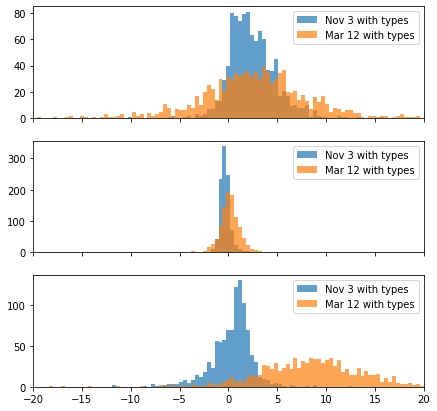

In [87]:
fig,axs=plt.subplots(nrows=3,figsize=[7,7],sharex=True)
bins=np.linspace(-20,20,num=100)

for rate_constant_index in range(3):
    for experiment_index,experiment in enumerate(rate_experiments):
        #plt.violinplot(rates_array[experiment_index],showmeans=True,points=trials)
        axs[rate_constant_index].hist(rates_array[experiment_index].T[rate_constant_index],bins=bins,alpha=0.7,label=experiment.descriptor)
        #_=ax.hist(rates_array[experiment_index].T[0],bins=100,alpha=0.7,color='orange')
    axs[rate_constant_index].legend()
    axs[rate_constant_index].set_xlim([-20,20])



In [76]:
axs[2]

IndexError: tuple index out of range

In [ ]:


dec7 = Series('Dec 7', interpolate_T)
counts = np.multiply([633, 566, 298, 325], 1)
fractions = [0.0458, 0.362, 0.987, 0.99999]  # ice fraction for focused
distances = np.multiply([40, 45, 47.5, 50], 0.001)  # in m

dec7.set_observables(frequency=398,
                     d_value=18.145e-6,
                     d_sigma=0.409e-6,
                     s_value=38.676e-6,
                     s_sigma=4.063e-6,
                     q_value=57.5,
                     distances=distances,
                     counts=counts,
                     fractions=fractions)


# This is with the last half cutout, when the pressure dropped.
nov3 = Series('Nov 3', interpolate_T)

counts = np.multiply([48, 27, 34, 210, 715, 881, 797, 84], 1)
fractions = [0, 0.03, 0.00, 0.06, 0.04, 0.04,
             0.13, 0.35]  # ice fraction for focused
distances = np.multiply([15, 20, 25, 30, 35, 40, 45, 50], 0.001)  # in m

nov3.set_observables(d_value=20.2e-6,
                     d_sigma=0.496e-6,
                     s_value=58.3e-6,
                     s_sigma=3.67e-6,
                     q_value=56.5,
                     distances=distances,
                     counts=counts,
                     fractions=fractions)


'''
Data from https://docs.google.com/spreadsheets/d/11-GYikog0r1H5IH8vmNHlBlmi4fgEX_WUqMD0C2dIpY/edit#gid=0
and from https://docs.google.com/spreadsheets/d/1VOADjIf649fGTbqI5R4Td48dqzSHE5dx0zcEj2TWAcc/edit#gid=2063575402
'''
mar12 = Series('Mar 12', interpolate_T)
counts = np.multiply([158, 113, 471, 319, 406, 327, 454, 206, 220], 1)
fractions = [0, 0.01769911504, 0.05732484076, 0.09404388715, 0.06896551724,
             0.07339449541, 0.1696035242, 0.6213592233, 0.9181818182]  # ice fraction for focused
distances = np.multiply(
    [25, 30, 35, 37.5, 40, 42.5, 45, 47.5, 50], 0.001)  # in m
mar12.set_observables(d_value=21.44656962e-6,
                      d_sigma=1.400e-6,
                      s_value=58.3e-6,
                      s_sigma=3.67e-6,
                      q_value=55.1,
                      distances=distances,
                      counts=counts,
                      fractions=fractions)


experiments = [dec7, mar12, nov3]
# experiments=[dec7]
for series in experiments:
    series.calculate_errors(percentile=5, do_J=True, trials=1000)
    series.generate_plotting_label()
    series.save_column_file()


# LAKSMONO
laksmono12 = Series('Laksmono 12um')
laksmono12.measured_distances = np.multiply([30.60, 40.40, 45.60, 50.63], 1e-3)
laksmono12.calculated_distances = np.multiply([35.50, 43, 48.12], 1e-3)
laksmono12.ideal_T_at_measured = [232.03, 228.81, 227.58, 226.57]
laksmono12.ideal_T_at_calculated = [230.42, 228.19, 227.08]
laksmono12.low_T_err = [1, 1, 1]
laksmono12.high_T_err = [2, 2, 2]
laksmono12.low_T_err_at_measured = [0.10, 1.00, 1.00, 1.00]
laksmono12.high_T_err_at_measured = [2, 2, 2, 2]
laksmono12.ideal_J = np.multiply([2.11E+11, 3.22E+12, 3.58E+12], 1e6)
laksmono12.low_J_err = np.multiply([1.38E+11, 7.90E+11, 2.79E+12], 1e6)
laksmono12.high_J_err = np.multiply([3.12E+12, 4.60E+13, 5.76E+13], 1e6)
laksmono12.plot_label = 'Laksmono 12 um'

laksmono9 = Series('Laksmono 9um')
laksmono9.measured_distances = np.multiply([25.88, 36.04, 46.09], 1e-3)
laksmono9.calculated_distances = np.multiply([30.96, 41.07], 1e-3)
laksmono9.ideal_T_at_measured = [233.36, 230.23, 228.10]
laksmono9.ideal_T_at_calculated = [231.79, 229.16]
laksmono9.low_T_err = [1, 1]
laksmono9.high_T_err = [2, 2]
laksmono9.low_T_err_at_measured = [1.00, 1.00, 1.00]
laksmono9.high_T_err_at_measured = [2, 2, 2]
laksmono9.ideal_J = np.multiply([2.69E+11, 8.45E+11], 1e6)
laksmono9.low_J_err = np.multiply([3.90E+10, 3.71E+11], 1e6)
laksmono9.high_J_err = np.multiply([3.81E+12, 1.22E+13], 1e6)
laksmono9.plot_label = 'Laksmono 9 um'


experiments.extend([laksmono9, laksmono12])


mar12.plot_kwargs = {'color': 'darkblue', 'marker': '^'}
nov3.plot_kwargs = {'color': 'blue', 'marker': 'o'}
dec7.plot_kwargs = {'color': 'teal', 'marker': 'x'}
laksmono12.plot_kwargs = {'color': 'red', 'marker': 's'}
laksmono9.plot_kwargs = {'color': 'darkorange', 'marker': 'D'}

plt.close('all')
plt.figure('T vs distance')
J_vs_distance_ax = plt.gca()
for series in experiments:
    series.plot_T_vs_measured_distance(
        ax=J_vs_distance_ax, label=series.plot_label)

J_vs_distance_ax.set_ylabel('J [1/s*m^3]')
J_vs_distance_ax.set_xlabel('Distance [m]')
J_vs_distance_ax.legend()

plt.figure('J vs T')
J_vs_T_ax = plt.gca()
for series in experiments:
    series.plot_J_vs_T(ax=J_vs_T_ax, label=series.plot_label)

J_vs_T_ax.set_ylabel('J [1/s*m^3]')
J_vs_T_ax.set_xlabel('Temperature [K]')
J_vs_T_ax.legend()

plt.figure('J vs T log', dpi=90, figsize=[8, 8])
J_vs_T_ax_log = plt.gca()
for series in experiments:
    series.plot_J_vs_T(
        ax=J_vs_T_ax_log, label=series.plot_label, **series.plot_kwargs)
    # J_vs_T_ax_log.scatter(series.T_MC_matrix.flatten(),series.J_MC_matrix.flatten(),alpha=0.1)


linthresh = 0.8e17
J_vs_T_ax_log.set_yscale('symlog', linthresh=linthresh,
                         linscale=0.5, subs=[2, 3, 4, 5, 6, 7, 8, 9])
J_vs_T_ax_log.set_ylabel('J [1/s*m^3]')
J_vs_T_ax_log.set_xlabel('Temperature [K]')
J_vs_T_ax_log.legend()
J_vs_T_ax_log.fill_between(J_vs_T_ax_log.get_xlim(
), y1=[-linthresh, -linthresh], y2=[linthresh, linthresh], color='lightgray')


plt.savefig('Publication_J_vs_T.pdf')

In [ ]:

series = mar12

# bin_sizes=[10,20,50,100,200]
bin_sizes = [50]
positions = range(len(series.calculated_distances))
# positions=[6]

for position in positions:
    for bin_size in bin_sizes:
        x = series.T_MC_matrix[:, position]
        y = series.J_MC_matrix[:, position]
        x_bins = bin_size
        y_bins = bin_size

        fig = plt.figure(figsize=[10, 10], dpi=90, constrained_layout=True)
        axd = fig.subplot_mosaic([['.', 'histx'], ['histy', 'scat']],
                                 gridspec_kw={'width_ratios': [2, 7],
                                              'height_ratios': [2, 7]})

        axd['histx'].sharex(axd['scat'])
        axd['histy'].sharey(axd['scat'])
        axd['histy'].invert_xaxis()

        _, _, _, im = axd['scat'].hist2d(
            x, y, cmap='Greys', bins=(x_bins, y_bins))
        axd['scat'].scatter(x, y, s=0.1, marker='.', c='red', alpha=0)

        fig.colorbar(im, orientation='horizontal', ax=axd['scat'], shrink=0.8)

        axd['histx'].hist(x, bins=x_bins)
        axd['histy'].hist(y, orientation='horizontal', bins=y_bins)

        linekwargs = {'color': 'black'}
        axd['scat'].axhline(series.ideal_J[position], **
                            linekwargs, label='Before MC')
        axd['histy'].axhline(series.ideal_J[position], **linekwargs)
        axd['scat'].axvline(
            series.ideal_T_at_calculated[position], **linekwargs)
        axd['histx'].axvline(
            series.ideal_T_at_calculated[position], **linekwargs)

        '''
        J
        '''

        linekwargs = {'color': 'black', 'alpha': 0.5}
        axd['scat'].axhline(series.low_J[position], **
                            linekwargs, label='Percentile low')
        axd['histy'].axhline(series.low_J[position], **linekwargs)

        linekwargs = {'color': 'black', 'alpha': 0.5}
        axd['scat'].axhline(series.high_J[position], **
                            linekwargs, label='Percentile high')
        axd['histy'].axhline(series.high_J[position], **linekwargs)

        '''
        T
        '''

        linekwargs = {'color': 'black', 'alpha': 0.5}
        axd['scat'].axvline(series.low_T[position], **
                            linekwargs, label='Percentile low')
        axd['histx'].axvline(series.low_T[position], **linekwargs)

        linekwargs = {'color': 'black', 'alpha': 0.5}
        axd['scat'].axvline(series.high_T[position], **
                            linekwargs, label='Percentile high')
        axd['histx'].axvline(series.high_T[position], **linekwargs)

        axd['scat'].set_ylabel('Nucleation Rate J')
        axd['scat'].set_xlabel('Temperature T')

        mean_x = np.mean(x)
        mean_y = np.mean(y)
        axd['scat'].scatter(mean_x, mean_y, marker='x',
                            c='red', s=500, label='Mean')
        median_x = np.median(x)
        median_y = np.median(y)
        axd['scat'].scatter(median_x, median_y, marker='x',
                            c='green', s=500, label='Median')

        axd['scat'].legend()
        fig.suptitle(str(series.calculated_distances[position]) + ' m')

In [ ]:


dec7 = Series('Dec 7', interpolate_T)
counts = np.multiply([633, 566, 298, 325], 1)
fractions = [0.0458, 0.362, 0.987, 0.99999]  # ice fraction for focused
distances = np.multiply([40, 45, 47.5, 50], 0.001)  # in m

dec7.set_observables(frequency=398,
                     d_value=18.145e-6,
                     d_sigma=0.409e-6,
                     s_value=38.676e-6,
                     s_sigma=4.063e-6,
                     q_value=57.5,
                     distances=distances[:3],
                     counts=counts[:3],
                     fractions=fractions[:3])

# This is with the last half cutout, when the pressure dropped.
nov3 = Series('Nov 3', interpolate_T)

counts = np.multiply([48, 27, 34, 210, 715, 881, 797, 84], 1)
fractions = [0, 0.03, 0.00, 0.06, 0.04, 0.04,
             0.13, 0.35]  # ice fraction for focused
distances = np.multiply([15, 20, 25, 30, 35, 40, 45, 50], 0.001)  # in m

nov3.set_observables(d_value=20.2e-6,
                     d_sigma=0.496e-6,
                     s_value=58.3e-6,
                     s_sigma=3.67e-6,
                     q_value=56.5,
                     distances=distances[4:],
                     counts=counts[4:],
                     fractions=fractions[4:])

mar12 = Series('Mar 12', interpolate_T)
'''
Data from https://docs.google.com/spreadsheets/d/11-GYikog0r1H5IH8vmNHlBlmi4fgEX_WUqMD0C2dIpY/edit#gid=0
and from https://docs.google.com/spreadsheets/d/1VOADjIf649fGTbqI5R4Td48dqzSHE5dx0zcEj2TWAcc/edit#gid=2063575402
'''
counts = np.multiply([158, 113, 471, 319, 406, 327, 454, 206, 220], 1)
fractions = [0, 0.01769911504, 0.05732484076, 0.09404388715, 0.06896551724,
             0.07339449541, 0.1696035242, 0.6213592233, 0.9181818182]  # ice fraction for focused
distances = np.multiply(
    [25, 30, 35, 37.5, 40, 42.5, 45, 47.5, 50], 0.001)  # in m
mar12.set_observables(d_value=21.44656962e-6,
                      d_sigma=1.400e-6,
                      s_value=58.3e-6,
                      s_sigma=3.67e-6,
                      q_value=55.1,
                      distances=distances[4:],
                      counts=counts[4:],
                      fractions=fractions[4:])


experiments = [dec7, mar12, nov3]
# experiments=[dec7]
for series in experiments:
    series.calculate_errors(percentile=5, do_J=True, trials=5000)
    series.generate_plotting_label()


# LAKSMONO
laksmono12 = Series('Laksmono 12um')
laksmono12.measured_distances = np.multiply([30.60, 40.40, 45.60, 50.63], 1e-3)
laksmono12.calculated_distances = np.multiply([35.50, 43, 48.12], 1e-3)
laksmono12.ideal_T_at_measured = [232.03, 228.81, 227.58, 226.57]
laksmono12.ideal_T_at_calculated = [230.42, 228.19, 227.08]
laksmono12.low_T_err = [1, 1, 1]
laksmono12.high_T_err = [2, 2, 2]
laksmono12.low_T_err_at_measured = [0.10, 1.00, 1.00, 1.00]
laksmono12.high_T_err_at_measured = [2, 2, 2, 2]
laksmono12.ideal_J = np.multiply([2.11E+11, 3.22E+12, 3.58E+12], 1e6)
laksmono12.low_J_err = np.multiply([1.38E+11, 7.90E+11, 2.79E+12], 1e6)
laksmono12.high_J_err = np.multiply([3.12E+12, 4.60E+13, 5.76E+13], 1e6)
laksmono12.plot_label = 'Laksmono 12 um'

laksmono9 = Series('Laksmono 9um')
laksmono9.measured_distances = np.multiply([25.88, 36.04, 46.09], 1e-3)
laksmono9.calculated_distances = np.multiply([30.96, 41.07], 1e-3)
laksmono9.ideal_T_at_measured = [233.36, 230.23, 228.10]
laksmono9.ideal_T_at_calculated = [231.79, 229.16]
laksmono9.low_T_err = [1, 1]
laksmono9.high_T_err = [2, 2]
laksmono9.low_T_err_at_measured = [1.00, 1.00, 1.00]
laksmono9.high_T_err_at_measured = [2, 2, 2]
laksmono9.ideal_J = np.multiply([2.69E+11, 8.45E+11], 1e6)
laksmono9.low_J_err = np.multiply([3.90E+10, 3.71E+11], 1e6)
laksmono9.high_J_err = np.multiply([3.81E+12, 1.22E+13], 1e6)
laksmono9.plot_label = 'Laksmono 9 um'

experiments.extend([laksmono9, laksmono12])


mar12.plot_kwargs = {'color': 'darkblue', 'marker': '^'}
nov3.plot_kwargs = {'color': 'blue', 'marker': 'o'}
dec7.plot_kwargs = {'color': 'teal', 'marker': 'x'}
laksmono12.plot_kwargs = {'color': 'red', 'marker': 's'}
laksmono9.plot_kwargs = {'color': 'darkorange', 'marker': 'D'}

plt.close('all')
plt.figure('T vs distance')
J_vs_distance_ax = plt.gca()
for series in experiments:
    series.plot_T_vs_measured_distance(
        ax=J_vs_distance_ax, label=series.plot_label)

J_vs_distance_ax.set_ylabel('J [1/s*m^3]')
J_vs_distance_ax.set_xlabel('Distance [m]')
J_vs_distance_ax.legend()

plt.figure('J vs T')
J_vs_T_ax = plt.gca()
for series in experiments:
    series.plot_J_vs_T(ax=J_vs_T_ax, label=series.plot_label)

J_vs_T_ax.set_ylabel('J [1/s*m^3]')
J_vs_T_ax.set_xlabel('Temperature [K]')
J_vs_T_ax.legend()

plt.figure('J vs T log', dpi=90, figsize=[8, 8])
J_vs_T_ax_log = plt.gca()
for series in experiments:
    series.plot_J_vs_T(
        ax=J_vs_T_ax_log, label=series.plot_label, **series.plot_kwargs)
    # J_vs_T_ax_log.scatter(series.T_MC_matrix.flatten(),series.J_MC_matrix.flatten(),alpha=0.1)


linthresh = 5e15
J_vs_T_ax_log.set_yscale('symlog', linthresh=linthresh,
                         linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
J_vs_T_ax_log.set_ylabel('J [1/s*m^3]')
J_vs_T_ax_log.set_xlabel('Temperature [K]')
J_vs_T_ax_log.legend()
J_vs_T_ax_log.fill_between(J_vs_T_ax_log.get_xlim(
), y1=[-linthresh, -linthresh], y2=[linthresh, linthresh], color='gray')

plt.savefig('Publication_J_vs_T_cheating.pdf')

In [ ]:
J_vs_T_ax_log.get_xlim()

In [ ]:
plt.figure()
plt.plot(nov_series.ideal_t_at_measured,
         nov_series.fractions, alpha=1, marker='.')

In [ ]:


counts = np.multiply([100, 100, 100, 100], 1)
fractions = [0.1, 0.2, 0.4, 0.8]  # ice fraction for focused
distances = np.multiply([30, 40, 50, 60], 0.001)  # in m

In [ ]:


first = Series('11.51', interpolate_T)


first.set_observables(d_value=20.094e-6,
                      d_sigma=0.33e-6,
                      s_value=51.2878e-6,
                      s_sigma=8.473e-6,
                      q_value=54.7,
                      distances=distances,
                      counts=counts,
                      fractions=fractions)

second = Series('13.30', interpolate_T)


second.set_observables(d_value=20.408e-6,
                       d_sigma=1.429e-6,
                       s_value=51.913e-6,
                       s_sigma=17.861e-6,
                       q_value=54.5,
                       distances=distances,
                       counts=counts,
                       fractions=fractions)

third = Series('270 Hz', interpolate_T)


third.set_observables(d_value=20.37e-6,
                      d_sigma=0.347e-6,
                      s_value=51.51e-6,
                      s_sigma=9.98e-6,
                      q_value=54.6,
                      distances=distances,
                      counts=counts,
                      fractions=fractions)

fourth = Series('14.44', interpolate_T)


fourth.set_observables(d_value=18.41e-6,
                       d_sigma=0.443e-6,
                       s_value=40.868e-6,
                       s_sigma=7.271e-6,
                       q_value=61.4,
                       distances=distances,
                       counts=counts,
                       fractions=fractions)

nov17 = [first, second, third, fourth]
# nov17=[third,fourth]

plt.figure()
ax = plt.gca()

for series in nov17:
    print(series.date)
    series.calculate_errors(percentile=5, do_J=False)
    # ax.scatter(nov_series.T_MC_matrix.flatten(),nov_series.J_MC_matrix.flatten(),alpha=1,marker='.')
    series.generate_plotting_label()
    series.plot_measured_T_vs_t(ax=ax, label=series.plot_label)

ax.set_xlabel('Time [s]')
ax.set_ylabel('Temperature [K]')
ax.legend()

In [ ]:
first = Series('11.51, 45,48 and 50 mm', interpolate_T)

counts = np.multiply([162, 100, 106], 1)
fractions = [0.4814814815, 0.88, 0.984375]  # ice fraction for focused
distances = np.multiply([45, 48, 50], 0.001)  # in m


first.set_observables(frequency=273.2,
                      d_value=20.094e-6,
                      d_sigma=0.33e-6,
                      s_value=51.2878e-6,
                      s_sigma=8.473e-6,
                      q_value=54.7,
                      distances=distances,
                      counts=counts,
                      fractions=fractions)

counts = np.multiply([162, 106], 1)
fractions = [0.4814814815, 0.984375]  # ice fraction for focused
distances = np.multiply([45, 50], 0.001)  # in m

second = Series('11.51, 45 and 50 mm', interpolate_T)

second.set_observables(frequency=273.2,
                       d_value=20.094e-6,
                       d_sigma=0.33e-6,
                       s_value=51.2878e-6,
                       s_sigma=8.473e-6,
                       q_value=54.7,
                       distances=distances,
                       counts=counts,
                       fractions=fractions)

nov17_J = [first, second]

plt.figure()
ax = plt.gca()
for series in nov17_J:
    print(series.date)
    series.calculate_errors(percentile=5, do_J=True, trials=10000)
    # ax.scatter(nov_series.T_MC_matrix.flatten(),nov_series.J_MC_matrix.flatten(),alpha=1,marker='.')
    series.generate_plotting_label()
    series.plot_measured_T_vs_t(ax=ax, label=series.plot_label)

ax.set_xlabel('Time [s]')
ax.set_ylabel('Temperature [K]')
ax.legend()

plt.figure()
ax = plt.gca()

for series in nov17_J:
    print(series.date)
    # ax.scatter(nov_series.T_MC_matrix.flatten(),nov_series.J_MC_matrix.flatten(),alpha=1,marker='.')
    series.generate_plotting_label()
    series.plot_J_vs_T(ax=ax, label=series.plot_label)
    ax.scatter(series.T_MC_matrix.flatten(),
               series.J_MC_matrix.flatten(), alpha=0.1)

ax.set_ylabel('J [1/s*m^3]')
ax.set_xlabel('Temperature [K]')
ax.legend()

In [ ]:
first = Series('Dec 7', interpolate_T)

counts = np.multiply([633, 566, 298, 325], 1)
fractions = [0.0458, 0.362, 0.987, 0.99999]  # ice fraction for focused
distances = np.multiply([40, 45, 47.5, 50], 0.001)  # in m

first.set_observables(frequency=398,
                      d_value=18.145e-6,
                      d_sigma=0.409e-6,
                      s_value=38.676e-6,
                      s_sigma=4.063e-6,
                      q_value=57.5,
                      distances=distances,
                      counts=counts,
                      fractions=fractions)

dec_7 = [first]

for series in dec_7:
    series.calculate_errors(percentile=5, do_J=True, trials=10000)

plt.figure()
ax = plt.gca()
for series in dec_7:
    print(series.date)
    # ax.scatter(nov_series.T_MC_matrix.flatten(),nov_series.J_MC_matrix.flatten(),alpha=1,marker='.')
    series.generate_plotting_label()
    series.plot_T_vs_measured_distance(ax=ax, label=series.plot_label)

ax.set_xlabel('Distance [m]')
ax.set_ylabel('Temperature [K]')
ax.legend()

plt.figure('J_plot')
J_ax = plt.gca()
for series in dec_7:
    print(series.date)
    # ax.scatter(nov_series.T_MC_matrix.flatten(),nov_series.J_MC_matrix.flatten(),alpha=1,marker='.')
    series.generate_plotting_label()
    series.plot_J_vs_T(ax=J_ax, label=series.plot_label)

J_ax.set_ylabel('J [1/s*m^3]')
J_ax.set_xlabel('Temperature [K]')
J_ax.legend()

plt.figure()
ax = plt.gca()
for series in dec_7:
    print(series.date)
    # ax.scatter(nov_series.T_MC_matrix.flatten(),nov_series.J_MC_matrix.flatten(),alpha=1,marker='.')
    series.generate_plotting_label()
    series.plot_J_vs_distance(ax=ax, label=series.plot_label)

ax.set_ylabel('J [1/s*m^3]')
ax.set_xlabel('Distance [m]')
ax.legend()

In [ ]:
for series in experiments:
    print('.....')
    print(series.calculated_distances)
    print(series.ideal_v)
    print(series.d_value)
    print(series.ideal_t_at_measured)
    print(series.low_t)
    print(series.ideal_t_at_calculated)
    print(series.ideal_J)

print('....')

for series in dec_7:
    print(np.array(series.high_J_err).T)

In [ ]:
for series in nov17_J:
    print(series.calculated_distances)
    print(series.ideal_v)
    print(series.d_value)
    print(series.ideal_t_at_measured)
    print(series.low_t)
    print(series.ideal_t_at_calculated)

print('....')

for series in nov17_J:
    print(np.array(series.high_J_err).T)

In [ ]:
np.std(series.T_MC_matrix_at_measured, axis=0)

In [ ]:
interpolate_T([2.02e-05*1e6, 0.001179175402407865], method='linear')

In [ ]:
interpolate_T.grid

In [ ]:
plt.imshow(nov_series.all_t)

In [ ]:
plt.scatter(nov_series.all_distances.flatten(), nov_series.all_T.flatten())

In [ ]:
np.shape(nov_series.all_t)

In [ ]:
for distance_i, distance in enumerate(nov_series.measured_distances):
    low = np.percentile(nov_series.T_MC_matrix_at_measured[:, distance_i], q=5)
    mid = nov_series.ideal_T_at_measured[distance_i]
    high = np.percentile(
        nov_series.T_MC_matrix_at_measured[:, distance_i], q=95)

    print('{0:.1f} {1:.1f} {2:.1f}'.format(low, mid, high))

In [ ]:

low = np.percentile(nov_series.T_MC_matrix_at_measured, q=5, axis=0)
high = np.percentile(nov_series.T_MC_matrix_at_measured, q=95, axis=0)

#print('{0:.1f} {1:.1f} {2:.1f}'.format(low,mid,high))

In [ ]:
low

In [ ]:
def binomial_interval(n, p, method='Wald'):
    z = 1.96
    if method == 'Wald':
        error = z*np.sqrt((1.0-p)*p/n)
    elif method == 'Agresti–Coull':
        error = z*np.sqrt((1.0-p)*p/(n+z*z))
    elif method == 'Wilson_upper':
        z = 1.96
        num = p+z*z/(2*n)+z*np.sqrt(p*(1-p)/n+z*z/(4*n*n))
        den = 1+(z*z)/n
        error = np.divide(num, den)
    elif method == 'Wilson_lower':
        z = -1.96
        num = p+z*z/(2*n)+z*np.sqrt(p*(1-p)/n+z*z/(4*n*n))
        den = 1+(z*z)/n
        error = np.divide(num, den)
    else:
        print('Not an implemented method specified')
    return error


print(binomial_interval(162, 0.48, method='Wilson_lower'))
print(binomial_interval(162, 0.48, method='Wilson_upper'))
print(binomial_interval(100, 0.34, method='Wilson_lower'))
print(binomial_interval(100, 0.34, method='Wilson_upper'))